<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.760918,73.570223,94.068737,29.060735,49.370815,303.831427,283.948657,19.882770
1,0.0,1.0,60.402001,99.809242,89.190754,31.389562,-19.641733,271.149827,311.852334,-40.702507
2,0.0,2.0,62.862320,82.110118,40.376211,44.916597,83.866071,324.131318,228.959442,95.171876
3,0.0,3.0,61.014178,65.554873,62.451956,70.414029,-44.441655,224.993380,239.059562,-14.066182
4,0.0,4.0,22.229736,42.726531,93.154366,25.803038,-109.164550,84.749120,246.859249,-162.110129
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.046027,67.053435,83.814719,38.160669,-88.530010,192.544840,360.477872,-167.933032
29996,999.0,26.0,39.677764,76.021407,66.987429,71.892242,-215.293159,49.285682,396.043669,-346.757987
29997,999.0,27.0,84.569577,30.103468,99.713123,61.373241,29.098509,314.857918,276.835429,38.022489
29998,999.0,28.0,44.571389,82.134889,85.887074,22.682283,-65.298799,179.976836,367.211976,-187.235140


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.760918,73.570223,94.068737,29.060735,49.370815,303.831427,283.948657,19.882770
1,0.0,1.0,60.402001,99.809242,89.190754,31.389562,-19.641733,271.149827,311.852334,-40.702507
2,0.0,2.0,62.862320,82.110118,40.376211,44.916597,83.866071,324.131318,228.959442,95.171876
3,0.0,3.0,61.014178,65.554873,62.451956,70.414029,-44.441655,224.993380,239.059562,-14.066182
4,0.0,4.0,22.229736,42.726531,93.154366,25.803038,-109.164550,84.749120,246.859249,-162.110129
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.046027,67.053435,83.814719,38.160669,-88.530010,192.544840,360.477872,-167.933032
29996,999.0,26.0,39.677764,76.021407,66.987429,71.892242,-215.293159,49.285682,396.043669,-346.757987
29997,999.0,27.0,84.569577,30.103468,99.713123,61.373241,29.098509,314.857918,276.835429,38.022489
29998,999.0,28.0,44.571389,82.134889,85.887074,22.682283,-65.298799,179.976836,367.211976,-187.235140


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    47.760918  73.570223  94.068737  29.060735   49.370815   
      1.0    60.402001  99.809242  89.190754  31.389562  -19.641733   
      2.0    62.862320  82.110118  40.376211  44.916597   83.866071   
      3.0    61.014178  65.554873  62.451956  70.414029  -44.441655   
      4.0    22.229736  42.726531  93.154366  25.803038 -109.164550   
...                ...        ...        ...        ...         ...   
999.0 25.0   82.046027  67.053435  83.814719  38.160669  -88.530010   
      26.0   39.677764  76.021407  66.987429  71.892242 -215.293159   
      27.0   84.569577  30.103468  99.713123  61.373241   29.098509   
      28.0   44.571389  82.134889  85.887074  22.682283  -65.298799   
      29.0   72.372125  29.264091  98.487013  78.768731   47.372771   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    303.831427  283.948657   19.882770  
      1.0    271.149827  311.852334  -40.702507  
      2.0    324.131318  228.959442   95.171876  
      3.0    224.993380  239.059562  -14.066182  
      4.0     84.749120  246.859249 -162.110129  
...                 ...         ...         ...  
999.0 25.0   192.544840  360.477872 -167.933032  
      26.0    49.285682  396.043669 -346.757987  
      27.0   314.857918  276.835429   38.022489  
      28.0   179.976836  367.211976 -187.235140  
      29.0   336.264731  288.847485   47.417246  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    47.760918  73.570223  94.068737  29.060735   49.370815   
      1.0    60.402001  99.809242  89.190754  31.389562  -19.641733   
      2.0    62.862320  82.110118  40.376211  44.916597   83.866071   
      3.0    61.014178  65.554873  62.451956  70.414029  -44.441655   
      4.0    22.229736  42.726531  93.154366  25.803038 -109.164550   
...                ...        ...        ...        ...         ...   
999.0 25.0   82.046027  67.053435  83.814719  38.160669  -88.530010   
      26.0   39.677764  76.021407  66.987429  71.892242 -215.293159   
      27.0   84.569577  30.103468  99.713123  61.373241   29.098509   
      28.0   44.571389  82.134889  85.887074  22.682283  -65.298799   
      29.0   72.372125  29.264091  98.487013  78.768731   47.372771   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    303.831427  283.948657   19.882770  
      1.0    271.149827  311.852334  -40.702507  
      2.0    324.131318  228.959442   95.171876  
      3.0    224.993380  239.059562  -14.066182  
      4.0     84.749120  246.859249 -162.110129  
...                 ...         ...         ...  
999.0 25.0   192.544840  360.477872 -167.933032  
      26.0    49.285682  396.043669 -346.757987  
      27.0   314.857918  276.835429   38.022489  
      28.0   179.976836  367.211976 -187.235140  
      29.0   336.264731  288.847485   47.417246  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.760918,73.570223,94.068737,29.060735,49.370815,303.831427,283.948657,19.882770
1,0.0,1.0,60.402001,99.809242,89.190754,31.389562,-19.641733,271.149827,311.852334,-40.702507
2,0.0,2.0,62.862320,82.110118,40.376211,44.916597,83.866071,324.131318,228.959442,95.171876
3,0.0,3.0,61.014178,65.554873,62.451956,70.414029,-44.441655,224.993380,239.059562,-14.066182
4,0.0,4.0,22.229736,42.726531,93.154366,25.803038,-109.164550,84.749120,246.859249,-162.110129
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.046027,67.053435,83.814719,38.160669,-88.530010,192.544840,360.477872,-167.933032
29996,999.0,26.0,39.677764,76.021407,66.987429,71.892242,-215.293159,49.285682,396.043669,-346.757987
29997,999.0,27.0,84.569577,30.103468,99.713123,61.373241,29.098509,314.857918,276.835429,38.022489
29998,999.0,28.0,44.571389,82.134889,85.887074,22.682283,-65.298799,179.976836,367.211976,-187.235140


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    47.760918  73.570223  94.068737  29.060735   49.370815   
      1.0    60.402001  99.809242  89.190754  31.389562  -19.641733   
      2.0    62.862320  82.110118  40.376211  44.916597   83.866071   
      3.0    61.014178  65.554873  62.451956  70.414029  -44.441655   
      4.0    22.229736  42.726531  93.154366  25.803038 -109.164550   
...                ...        ...        ...        ...         ...   
999.0 25.0   82.046027  67.053435  83.814719  38.160669  -88.530010   
      26.0   39.677764  76.021407  66.987429  71.892242 -215.293159   
      27.0   84.569577  30.103468  99.713123  61.373241   29.098509   
      28.0   44.571389  82.134889  85.887074  22.682283  -65.298799   
      29.0   72.372125  29.264091  98.487013  78.768731   47.372771   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    303.831427  283.948657   19.882770  
      1.0    271.149827  311.852334  -40.702507  
      2.0    324.131318  228.959442   95.171876  
      3.0    224.993380  239.059562  -14.066182  
      4.0     84.749120  246.859249 -162.110129  
...                 ...         ...         ...  
999.0 25.0   192.544840  360.477872 -167.933032  
      26.0    49.285682  396.043669 -346.757987  
      27.0   314.857918  276.835429   38.022489  
      28.0   179.976836  367.211976 -187.235140  
      29.0   336.264731  288.847485   47.417246  

[30000 rows x 8 columns]

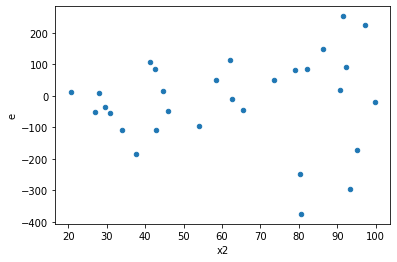

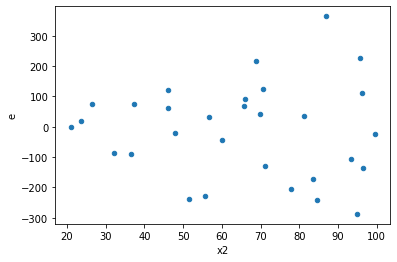

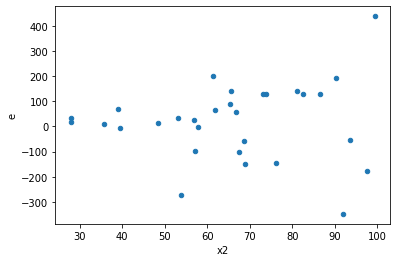

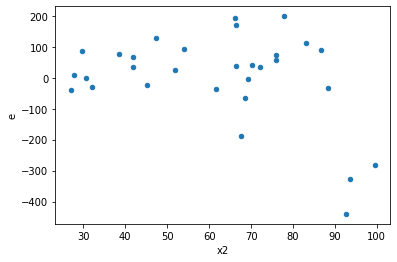

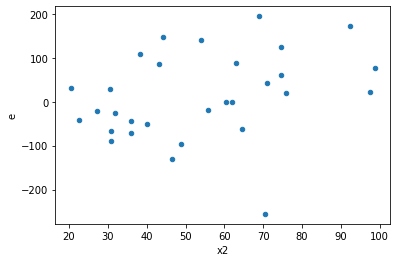

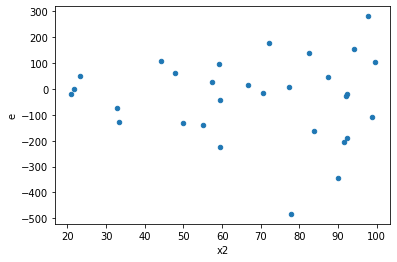

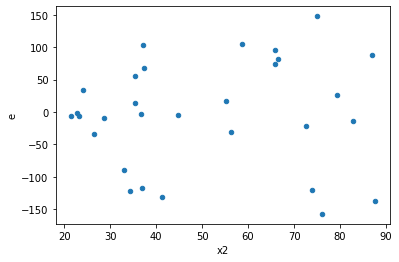

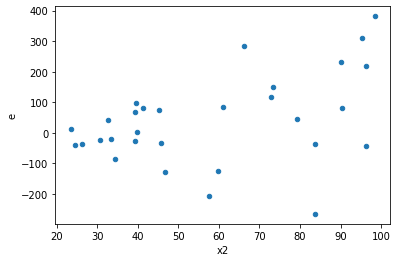

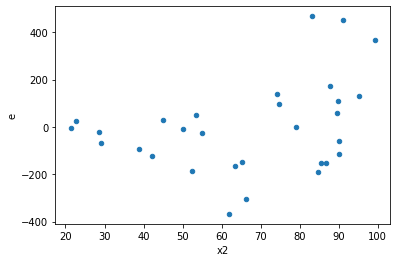

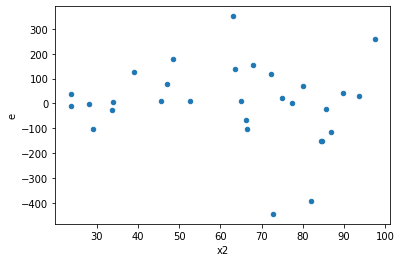

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,129372.36573922278,332299.1389476675,12937.236573922277,33229.91389476675,2.5685480593087893,0.15278736992109798,0.923606315039451,0.07639368496054899,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,138569.3756878352,322028.70959905005,13856.937568783522,32202.870959905005,2.3239529513686077,0.1996986135849581,0.900150693207521,0.09984930679247905,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,79649.63195423748,358747.2740687771,7964.963195423748,35874.72740687771,4.504066940006635,0.02601408898019275,0.9869929555099036,0.013007044490096376,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,250295.05885103458,251174.48674367697,25029.50588510346,25117.448674367697,1.003513564737072,0.9956842679202698,0.5021578660398651,0.4978421339601349,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,43286.70571587711,92855.84360605461,4328.6705715877115,9285.58436060546,2.1451353728679807,0.24462224763539853,0.8776888761823007,0.12231112381769926,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,47108.870588820486,230390.8833234222,4710.887058882048,23039.08833234222,4.890605112025267,0.019394948296914016,0.990302525851543,0.009697474148457008,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,34203.32771257382,528140.8952476081,3420.332771257382,52814.089524760806,15.441213781472293,0.00017044531873189328,0.999914777340634,8.522265936594664e-05,Reject001=0 : Heteroscedasticity
9.0,10.0,10.0,109938.89046652346,552494.7137582019,10993.889046652346,55249.47137582019,5.025471072281172,0.01757202331124863,0.9912139883443757,0.008786011655624315,Reject001=1 : Homoscedasticity
11.0,10.0,10.0,112120.02981654779,336251.7075231717,11212.00298165478,33625.170752317164,2.999033340192211,0.09794875426772998,0.951025622866135,0.04897437713386499,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,129372.36573922278,332299.1389476675,12937.236573922277,33229.91389476675,2.5685480593087893,0.15278736992109798,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,138569.3756878352,322028.70959905005,13856.937568783522,32202.870959905005,2.3239529513686077,0.1996986135849581,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,79649.63195423748,358747.2740687771,7964.963195423748,35874.72740687771,4.504066940006635,0.02601408898019275,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,188626.9536786555,35846.3550637424,18862.695367865548,3584.63550637424,0.19003835011198972,0.014842733402006673,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,102836.1378289674,98345.27777801323,10283.61378289674,9834.527777801322,0.9563299425108401,0.9451023518915442,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,250295.05885103458,251174.48674367697,25029.50588510346,25117.448674367697,1.003513564737072,0.9956842679202698,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,43286.70571587711,92855.84360605461,4328.6705715877115,9285.58436060546,2.1451353728679807,0.24462224763539853,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,47108.870588820486,230390.8833234222,4710.887058882048,23039.08833234222,4.890605112025267,0.019394948296914016,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,34203.32771257382,528140.8952476081,3420.332771257382,52814.089524760806,15.441213781472293,0.00017044531873189328,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      846
Reject001=0 : Heteroscedasticity    154
Name: Result_test, dtype: int64